In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid")

In [2]:
spot_data = pd.read_excel(r'C:\Users\chris\OneDrive\Dokumente\PDFs\Uni\Wahlpflichtmodule\Analysis of Economic and Financial Time Series\Seminararbeit\Data\sp500_spot_data.xlsx')
futures_data = pd.read_excel(r'C:\Users\chris\OneDrive\Dokumente\PDFs\Uni\Wahlpflichtmodule\Analysis of Economic and Financial Time Series\Seminararbeit\Data\sp500_futures_data.xlsx')

In [3]:
# Missing spot days
spot_dates = spot_data['date']
futures_dates = futures_data['date']
missing_spot_dates = futures_dates[~futures_dates.isin(spot_dates)]
print(f"Missing spot dates: {missing_spot_dates}")

Missing spot dates: 63     2015-04-03
990    2018-12-05
1575   2021-04-02
2083   2023-04-07
2525   2025-01-09
Name: date, dtype: datetime64[ns]


In [4]:
# Drop using the previously computed missing dates
futures_data = futures_data[~futures_data['date'].isin(missing_spot_dates)]
print(f"Futures data after dropping missing spot dates:\n{futures_data.head()}")

Futures data after dropping missing spot dates:
        date    price
0 2015-01-02  2046.25
1 2015-01-05  2016.00
2 2015-01-06  1994.50
3 2015-01-07  2019.50
4 2015-01-08  2055.00


In [5]:
# Calculate daily log returns
spot_data['log_return'] = np.log(spot_data['price'] / spot_data['price'].shift(1))
futures_data['log_return'] = np.log(futures_data['price'] / futures_data['price'].shift(1))
print("Spot data with log returns:\n", spot_data.head())
print("Futures data with log returns:\n", futures_data.head())

Spot data with log returns:
         date    price  log_return
0 2015-01-02  2058.20         NaN
1 2015-01-05  2020.58   -0.018447
2 2015-01-06  2002.61   -0.008933
3 2015-01-07  2025.90    0.011563
4 2015-01-08  2062.14    0.017730
Futures data with log returns:
         date    price  log_return
0 2015-01-02  2046.25         NaN
1 2015-01-05  2016.00   -0.014893
2 2015-01-06  1994.50   -0.010722
3 2015-01-07  2019.50    0.012457
4 2015-01-08  2055.00    0.017426


In [6]:
# Merge spot and futures data on date
merged_data = pd.merge(spot_data, futures_data, on='date', suffixes= ('_spot', '_futures'))
print("Merged data:\n", merged_data.head())
print(f"Number of rows in merged data: {len(merged_data)}")

Merged data:
         date  price_spot  log_return_spot  price_futures  log_return_futures
0 2015-01-02     2058.20              NaN        2046.25                 NaN
1 2015-01-05     2020.58        -0.018447        2016.00           -0.014893
2 2015-01-06     2002.61        -0.008933        1994.50           -0.010722
3 2015-01-07     2025.90         0.011563        2019.50            0.012457
4 2015-01-08     2062.14         0.017730        2055.00            0.017426
Number of rows in merged data: 2646


In [7]:
# Drop first row of merged data
merged_data = merged_data.dropna(subset=['log_return_spot', 'log_return_futures'])
print(merged_data.head())

        date  price_spot  log_return_spot  price_futures  log_return_futures
1 2015-01-05     2020.58        -0.018447        2016.00           -0.014893
2 2015-01-06     2002.61        -0.008933        1994.50           -0.010722
3 2015-01-07     2025.90         0.011563        2019.50            0.012457
4 2015-01-08     2062.14         0.017730        2055.00            0.017426
5 2015-01-09     2044.81        -0.008439        2035.25           -0.009657


In [8]:
# --- Set the Date as the Index ---

# Ensure the 'date' column is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Set the 'date' column as the DataFrame index
merged_data.set_index('date', inplace=True)
print("Merged data with date as index:\n", merged_data.head())

Merged data with date as index:
             price_spot  log_return_spot  price_futures  log_return_futures
date                                                                      
2015-01-05     2020.58        -0.018447        2016.00           -0.014893
2015-01-06     2002.61        -0.008933        1994.50           -0.010722
2015-01-07     2025.90         0.011563        2019.50            0.012457
2015-01-08     2062.14         0.017730        2055.00            0.017426
2015-01-09     2044.81        -0.008439        2035.25           -0.009657


In [9]:
def rescale_log_returns(df, scale_factor=100):
    df['log_return_spot'] *= scale_factor
    df['log_return_futures'] *= scale_factor
    return df
merged_data = rescale_log_returns(merged_data)

In [10]:
merged_data = merged_data[['log_return_spot', 'log_return_futures']]
print("Final merged data with log returns:\n", merged_data.head())

Final merged data with log returns:
             log_return_spot  log_return_futures
date                                           
2015-01-05        -1.844722           -1.489350
2015-01-06        -0.893327           -1.072196
2015-01-07         1.156272            1.245656
2015-01-08         1.773023            1.742589
2015-01-09        -0.843940           -0.965719


Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
c:\Users\chris\anaconda3\Lib\site-packages\rpy2\rinterface\__init__.py:1211: UserWarning: Environment variable "PATH" redefined by R and overriding existing variable. Current: "c:\Users\chris\anaconda3;C:\Users\chris\anaconda3;C:\Users\chris\anaconda3\Library\mingw-w64\bin;C:\Users\chris\anaconda3\Library\usr\bin;C:\Users\chris\anaconda3\Library\bin;C:\Users\chris\anaconda3\Scripts;C:\Users\chris\anaconda3\bin;C:\Users\chris\anaconda3\condabin;C:\Program Files\Eclipse Adoptium\jdk-11.0.24.8-hotspot\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\dotnet;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\NVIDIA Corporation\NVIDIA

[INFO] Iteration 2000: stds = {'log_return_spot': 1.1927147053235052, 'log_return_futures': 1.1909362475770757}
Starting GJR fit...
GJR fit successful
GJR forecast successful
H_forecast dimensions: 2 2 
H_forecast class: matrix array 
Covariance (spot, futures): 1.386148 
Variance (futures): 1.395712 
GJR OHR computed: 0.9931475 
Starting sGARCH fit...
sGARCH fit successful
sGARCH forecast successful
H_forecast dimensions: 2 2 
H_forecast class: matrix array 
Covariance (spot, futures): 1.516142 
Variance (futures): 1.501047 
sGARCH OHR computed: 1.010056 
[DEBUG] Iter 2000 — GJR OHR: 0.993147451312581, sGARCH OHR: 1.0100562998157852
[INFO] Iteration 2001: stds = {'log_return_spot': 1.1920751296300642, 'log_return_futures': 1.1905598887275435}
Starting GJR fit...
GJR fit successful
GJR forecast successful
H_forecast dimensions: 2 2 
H_forecast class: matrix array 
Covariance (spot, futures): 1.185122 
Variance (futures): 1.194517 
GJR OHR computed: 0.992135 
Starting sGARCH fit...
sGAR

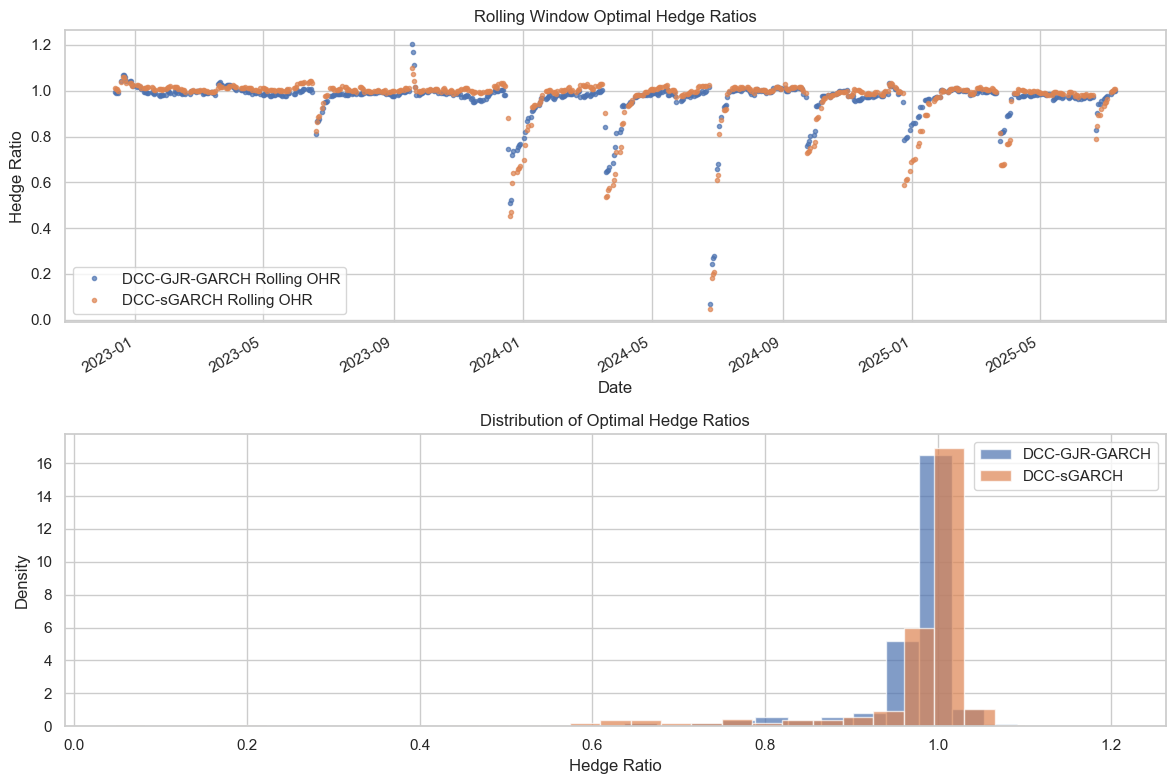


--- Summary Statistics of OHRs ---
       DCC-GJR-GARCH  DCC-sGARCH
count     645.000000  645.000000
mean        0.965214    0.966648
std         0.089177    0.112179
min         0.068002    0.047457
25%         0.974328    0.985571
50%         0.986069    0.999769
75%         0.997302    1.010201
max         1.205726    1.101078


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid")
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import r as r_instance

# --- ASSUMPTION ---
# This script assumes 'merged_data' is a pandas DataFrame that is already:
# 1. Loaded and available.
# 2. Has a datetime index.
# 3. Contains 'log_return_spot' and 'log_return_futures' columns.
# 4. The log return columns have been scaled by 100.

# --- R Setup ---
utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1)
packnames = ('rugarch', 'rmgarch')
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(ro.vectors.StrVector(names_to_install))

ro.r('Sys.setlocale("LC_ALL", "C")')
ro.r('library(rugarch)')
ro.r('library(rmgarch)')

# --- Rolling Window Parameters ---
window_size = 2000
forecast_horizon = 1

# --- Initialize lists to store results ---
gjr_ohrs_oos_rolling = []
sgarch_ohrs_oos_rolling = []
actual_spot_returns_rolling = []
actual_futures_returns_rolling = []
forecast_dates_rolling = []

for i in range(window_size, len(merged_data)):
    current_window_data = merged_data.iloc[i - window_size : i][['log_return_spot', 'log_return_futures']].copy()
    current_forecast_data = merged_data.iloc[i : i + forecast_horizon][['log_return_spot', 'log_return_futures']].copy()

    if len(current_forecast_data) < forecast_horizon:
        break

    if current_window_data.isnull().any().any() or (current_window_data.std() < 1e-6).any():
        print(f"[WARN] Skipping iteration {i} due to NaN or near-zero variance")
        gjr_ohrs_oos_rolling.append(np.nan)
        sgarch_ohrs_oos_rolling.append(np.nan)
        actual_spot_returns_rolling.append(current_forecast_data['log_return_spot'].iloc[0])
        actual_futures_returns_rolling.append(current_forecast_data['log_return_futures'].iloc[0])
        forecast_dates_rolling.append(current_forecast_data.index[0])
        continue

    print(f"[INFO] Iteration {i}: stds = {current_window_data.std().to_dict()}")

    with localconverter(ro.default_converter + pandas2ri.converter):
        r_current_window_data = ro.conversion.py2rpy(current_window_data)
    ro.globalenv['current_returns_for_fit'] = r_current_window_data

    # 🔧 FIXED R CODE BLOCK WITH PROPER COVARIANCE MATRIX EXTRACTION 🔧
    r_code_rolling_fit_forecast = f"""
    ohr_gjr_next_val <- NA
    ohr_sgarch_next_val <- NA

    tryCatch({{
        library(rugarch)
        library(rmgarch)

        # --- GJR-GARCH ---
        cat("Starting GJR fit...\\n")
        spec_gjr_ar1_rolling <- ugarchspec(
            variance.model = list(model = "gjrGARCH", garchOrder = c(1, 1)),
            mean.model = list(armaOrder = c(1, 0), include.mean = TRUE),
            distribution.model = "sstd"
        )
        dcc_spec_gjr_ar1_rolling <- dccspec(
            uspec = multispec(replicate(ncol(current_returns_for_fit), spec_gjr_ar1_rolling)),
            dccOrder = c(1, 1),
            distribution = "mvt"
        )
        dcc_fit_gjr_ar1_rolling <- tryCatch({{
            dccfit(dcc_spec_gjr_ar1_rolling, data = current_returns_for_fit,
                   solver = "solnp", fit.control = list(sol.n.restarts = 15))
        }}, error = function(e) {{
            cat("GJR Fit Error:", conditionMessage(e), "\\n")
            return(NULL)
        }})

        if (!is.null(dcc_fit_gjr_ar1_rolling)) {{
            cat("GJR fit successful\\n")
            forecast_gjr_rolling <- tryCatch({{
                dccforecast(dcc_fit_gjr_ar1_rolling, n.ahead = 1)
            }}, error = function(e) {{
                cat("GJR Forecast Error:", conditionMessage(e), "\\n")
                return(NULL)
            }})

            if (!is.null(forecast_gjr_rolling)) {{
                cat("GJR forecast successful\\n")
                
                # FIXED: Proper extraction of covariance matrix
                tryCatch({{
                    # Extract the conditional covariance matrix for t+1
                    H_forecast <- forecast_gjr_rolling@mforecast$H[[1]][,,1]
                    
                    # Alternative extraction methods if the above fails
                    if (is.null(H_forecast) || !is.matrix(H_forecast)) {{
                        # Try alternative extraction
                        H_forecast <- forecast_gjr_rolling@mforecast$H[[1]]
                        if (is.array(H_forecast) && length(dim(H_forecast)) == 3) {{
                            H_forecast <- H_forecast[,,1]
                        }}
                    }}
                    
                    cat("H_forecast dimensions:", dim(H_forecast), "\\n")
                    cat("H_forecast class:", class(H_forecast), "\\n")
                    
                    if (is.matrix(H_forecast) && nrow(H_forecast) == 2 && ncol(H_forecast) == 2) {{
                        cov_spot_fut <- H_forecast[1, 2]
                        var_fut <- H_forecast[2, 2]
                        
                        cat("Covariance (spot, futures):", cov_spot_fut, "\\n")
                        cat("Variance (futures):", var_fut, "\\n")
                        
                        if (!is.na(var_fut) && var_fut != 0 && is.finite(var_fut)) {{
                            ohr_gjr_next_val <- cov_spot_fut / var_fut
                            cat("GJR OHR computed:", ohr_gjr_next_val, "\\n")
                        }} else {{
                            cat("Warning: Invalid futures variance (GJR):", var_fut, "\\n")
                        }}
                    }} else {{
                        cat("Warning: H_forecast is not a valid 2x2 matrix (GJR)\\n")
                        cat("Actual dimensions:", dim(H_forecast), "\\n")
                        print(H_forecast)
                    }}
                }}, error = function(e) {{
                    cat("Error extracting covariance matrix (GJR):", conditionMessage(e), "\\n")
                }})
            }}
        }}

        # --- sGARCH ---
        cat("Starting sGARCH fit...\\n")
        spec_sgarch_ar1_rolling <- ugarchspec(
            variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
            mean.model = list(armaOrder = c(1, 0), include.mean = TRUE),
            distribution.model = "sstd"
        )
        dcc_spec_sgarch_ar1_rolling <- dccspec(
            uspec = multispec(replicate(ncol(current_returns_for_fit), spec_sgarch_ar1_rolling)),
            dccOrder = c(1, 1),
            distribution = "mvt"
        )
        dcc_fit_sgarch_ar1_rolling <- tryCatch({{
            dccfit(dcc_spec_sgarch_ar1_rolling, data = current_returns_for_fit,
                   solver = "solnp", fit.control = list(sol.n.restarts = 15))
        }}, error = function(e) {{
            cat("sGARCH Fit Error:", conditionMessage(e), "\\n")
            return(NULL)
        }})

        if (!is.null(dcc_fit_sgarch_ar1_rolling)) {{
            cat("sGARCH fit successful\\n")
            forecast_sgarch_rolling <- tryCatch({{
                dccforecast(dcc_fit_sgarch_ar1_rolling, n.ahead = 1)
            }}, error = function(e) {{
                cat("sGARCH Forecast Error:", conditionMessage(e), "\\n")
                return(NULL)
            }})

            if (!is.null(forecast_sgarch_rolling)) {{
                cat("sGARCH forecast successful\\n")
                
                # FIXED: Proper extraction of covariance matrix
                tryCatch({{
                    # Extract the conditional covariance matrix for t+1
                    H_forecast <- forecast_sgarch_rolling@mforecast$H[[1]][,,1]
                    
                    # Alternative extraction methods if the above fails
                    if (is.null(H_forecast) || !is.matrix(H_forecast)) {{
                        # Try alternative extraction
                        H_forecast <- forecast_sgarch_rolling@mforecast$H[[1]]
                        if (is.array(H_forecast) && length(dim(H_forecast)) == 3) {{
                            H_forecast <- H_forecast[,,1]
                        }}
                    }}
                    
                    cat("H_forecast dimensions:", dim(H_forecast), "\\n")
                    cat("H_forecast class:", class(H_forecast), "\\n")
                    
                    if (is.matrix(H_forecast) && nrow(H_forecast) == 2 && ncol(H_forecast) == 2) {{
                        cov_spot_fut <- H_forecast[1, 2]
                        var_fut <- H_forecast[2, 2]
                        
                        cat("Covariance (spot, futures):", cov_spot_fut, "\\n")
                        cat("Variance (futures):", var_fut, "\\n")
                        
                        if (!is.na(var_fut) && var_fut != 0 && is.finite(var_fut)) {{
                            ohr_sgarch_next_val <- cov_spot_fut / var_fut
                            cat("sGARCH OHR computed:", ohr_sgarch_next_val, "\\n")
                        }} else {{
                            cat("Warning: Invalid futures variance (sGARCH):", var_fut, "\\n")
                        }}
                    }} else {{
                        cat("Warning: H_forecast is not a valid 2x2 matrix (sGARCH)\\n")
                        cat("Actual dimensions:", dim(H_forecast), "\\n")
                        print(H_forecast)
                    }}
                }}, error = function(e) {{
                    cat("Error extracting covariance matrix (sGARCH):", conditionMessage(e), "\\n")
                }})
            }}
        }}

        ohr_gjr_next <- ohr_gjr_next_val
        ohr_sgarch_next <- ohr_sgarch_next_val

    }}, error = function(e) {{
        cat("Top-level R block error:", conditionMessage(e), "\\n")
    }})
    """

    try:
        ro.r(r_code_rolling_fit_forecast)

        gjr_val = ro.globalenv['ohr_gjr_next'][0] if 'ohr_gjr_next' in ro.globalenv and not ro.baseenv['is.na'](ro.globalenv['ohr_gjr_next'])[0] else np.nan
        sgarch_val = ro.globalenv['ohr_sgarch_next'][0] if 'ohr_sgarch_next' in ro.globalenv and not ro.baseenv['is.na'](ro.globalenv['ohr_sgarch_next'])[0] else np.nan

        print(f"[DEBUG] Iter {i} — GJR OHR: {gjr_val}, sGARCH OHR: {sgarch_val}")

        # Diagnostic block to inspect failing data windows
        if np.isnan(gjr_val) or np.isnan(sgarch_val):
            print(f"[DIAGNOSTICS] Iteration {i} failed. Data window summary:")
            print(current_window_data.describe())

        gjr_ohrs_oos_rolling.append(gjr_val)
        sgarch_ohrs_oos_rolling.append(sgarch_val)
        actual_spot_returns_rolling.append(current_forecast_data['log_return_spot'].iloc[0])
        actual_futures_returns_rolling.append(current_forecast_data['log_return_futures'].iloc[0])
        forecast_dates_rolling.append(current_forecast_data.index[0])

    except Exception as e:
        print(f"[ERROR] Iter {i} ({current_forecast_data.index[0].date()}): {e}")
        gjr_ohrs_oos_rolling.append(np.nan)
        sgarch_ohrs_oos_rolling.append(np.nan)
        actual_spot_returns_rolling.append(current_forecast_data['log_return_spot'].iloc[0])
        actual_futures_returns_rolling.append(current_forecast_data['log_return_futures'].iloc[0])
        forecast_dates_rolling.append(current_forecast_data.index[0])

    if (i - window_size + 1) % 50 == 0:
        print(f"Processed {i - window_size + 1} forecasts... Last date: {current_forecast_data.index[0].date()}")

print("Rolling window forecasting complete.")

# --- Post-Processing and Evaluation ---
rolling_oos_df = pd.DataFrame({
    'log_return_spot': actual_spot_returns_rolling,
    'log_return_futures': actual_futures_returns_rolling,
    'OHR_GJR_GARCH_Rolling': gjr_ohrs_oos_rolling,
    'OHR_sGARCH_Rolling': sgarch_ohrs_oos_rolling
}, index=forecast_dates_rolling)

rolling_oos_df.dropna(subset=['OHR_GJR_GARCH_Rolling', 'OHR_sGARCH_Rolling'], inplace=True, how='all')

if not rolling_oos_df.empty:
    rolling_oos_df['log_return_spot'] /= 100
    rolling_oos_df['log_return_futures'] /= 100

    rolling_oos_df['Hedged_Return_GJR_GARCH_Rolling'] = rolling_oos_df['log_return_spot'] - rolling_oos_df['OHR_GJR_GARCH_Rolling'] * rolling_oos_df['log_return_futures']
    rolling_oos_df['Hedged_Return_sGARCH_Rolling'] = rolling_oos_df['log_return_spot'] - rolling_oos_df['OHR_sGARCH_Rolling'] * rolling_oos_df['log_return_futures']

    var_unhedged_rolling = rolling_oos_df['log_return_spot'].var()
    var_gjr_garch_rolling = rolling_oos_df['Hedged_Return_GJR_GARCH_Rolling'].var()
    var_sgarch_rolling = rolling_oos_df['Hedged_Return_sGARCH_Rolling'].var()

    he_gjr_garch_rolling = (var_unhedged_rolling - var_gjr_garch_rolling) / var_unhedged_rolling if var_unhedged_rolling > 0 else 0
    he_sgarch_rolling = (var_unhedged_rolling - var_sgarch_rolling) / var_unhedged_rolling if var_unhedged_rolling > 0 else 0

    results_rolling_oos = {
        "Strategy": ["Unhedged", "DCC-sGARCH (Rolling)", "DCC-GJR-GARCH (Rolling)"],
        "Out-of-Sample Variance": [var_unhedged_rolling, var_sgarch_rolling, var_gjr_garch_rolling],
        "Out-of-Sample HE": ["-", f"{he_sgarch_rolling:.2%}", f"{he_gjr_garch_rolling:.2%}"]
    }
    results_df_rolling_oos = pd.DataFrame(results_rolling_oos)

    print("\n--- Rolling Window Out-of-Sample Hedging Performance ---")
    print(results_df_rolling_oos.to_string(index=False))

    # --- Plotting the Rolling OHRs ---
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Time series of OHRs
    plt.subplot(2, 1, 1)
    rolling_oos_df['OHR_GJR_GARCH_Rolling'].plot(label='DCC-GJR-GARCH Rolling OHR', marker='.', linestyle='None', alpha=0.7)
    rolling_oos_df['OHR_sGARCH_Rolling'].plot(label='DCC-sGARCH Rolling OHR', marker='.', linestyle='None', alpha=0.7)
    plt.title('Rolling Window Optimal Hedge Ratios')
    plt.ylabel('Hedge Ratio')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Distribution of OHRs
    plt.subplot(2, 1, 2)
    valid_gjr = rolling_oos_df['OHR_GJR_GARCH_Rolling'].dropna()
    valid_sgarch = rolling_oos_df['OHR_sGARCH_Rolling'].dropna()
    
    if len(valid_gjr) > 0:
        plt.hist(valid_gjr, bins=30, alpha=0.7, label='DCC-GJR-GARCH', density=True)
    if len(valid_sgarch) > 0:
        plt.hist(valid_sgarch, bins=30, alpha=0.7, label='DCC-sGARCH', density=True)
    
    plt.title('Distribution of Optimal Hedge Ratios')
    plt.xlabel('Hedge Ratio')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n--- Summary Statistics of OHRs ---")
    ohr_stats = pd.DataFrame({
        'DCC-GJR-GARCH': valid_gjr.describe() if len(valid_gjr) > 0 else pd.Series(),
        'DCC-sGARCH': valid_sgarch.describe() if len(valid_sgarch) > 0 else pd.Series()
    })
    print(ohr_stats)
    
else:
    print("\nNo valid hedging results to display. All forecasts may have failed.")